In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
dataset_path = '/content/gdrive/My Drive/project/dataset/'

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
dataset = pd.read_csv(dataset_path+'processed/cleanDatasetWithEncoding.csv')

In [22]:
dataset.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytess', 'FlowPacketss', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax',
       'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax',
       'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'FwdPSHFlags', 'FwdURGFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount',
       'ECEFlagCount', 'DownUpRatio', 'AveragePacketSize', 'AvgFw

In [23]:
dataset['FwdHeaderLength.1'] == dataset['FwdHeaderLength']

0          True
1          True
2          True
3          True
4          True
           ... 
2520906    True
2520907    True
2520908    True
2520909    True
2520910    True
Length: 2520911, dtype: bool

In [26]:
dataset.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytess', 'FlowPacketss', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax',
       'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax',
       'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'FwdPSHFlags', 'FwdURGFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount',
       'ECEFlagCount', 'DownUpRatio', 'AveragePacketSize', 'AvgFw

In [27]:
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')
labels = dataset['Label']
features.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,49188.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49486.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.000000,0.000000,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88.0,609.0,7.0,4.0,484.0,414.0,233.0,0.0,69.142860,111.967896,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88.0,879.0,9.0,4.0,656.0,3064.0,313.0,0.0,72.888885,136.153810,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,88.0,1160.0,9.0,6.0,3134.0,3048.0,1552.0,0.0,348.222230,682.482540,...,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.3, random_state=42)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [29]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [30]:
X_train_fs, X_test_fs, fs = select_features(features_train, labels_train, features_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 4113.051458
Feature 1: 36571.041655
Feature 2: 7.888470
Feature 3: 4.179092
Feature 4: 3179.475121
Feature 5: 3.525610
Feature 6: 1202.340393
Feature 7: 2292.219153
Feature 8: 1166.338725
Feature 9: 1006.921688
Feature 10: 158836.533745
Feature 11: 9618.949754
Feature 12: 165895.223446
Feature 13: 166722.199195
Feature 14: 63.869567
Feature 15: 1041.223580
Feature 16: 19371.445771
Feature 17: 77027.576896
Feature 18: 125410.175175
Feature 19: 7577.315980
Feature 20: 37051.320389
Feature 21: 15053.331038
Feature 22: 170972.352591
Feature 23: 124699.656994
Feature 24: 3149.718386
Feature 25: 3894.292641
Feature 26: 5455.335902
Feature 27: 19749.148948
Feature 28: 14065.898127
Feature 29: 3405.358932
Feature 30: 2008.727150
Feature 31: 0.639730
Feature 32: 0.055985
Feature 33: 0.091444
Feature 34: 838.052326
Feature 35: 3291.154455
Feature 36: 10625.239852
Feature 37: 122885.951017
Feature 38: 106241.741150
Feature 39: 136097.285970
Feature 40: 99608.372304
Feature 41: 36757.86

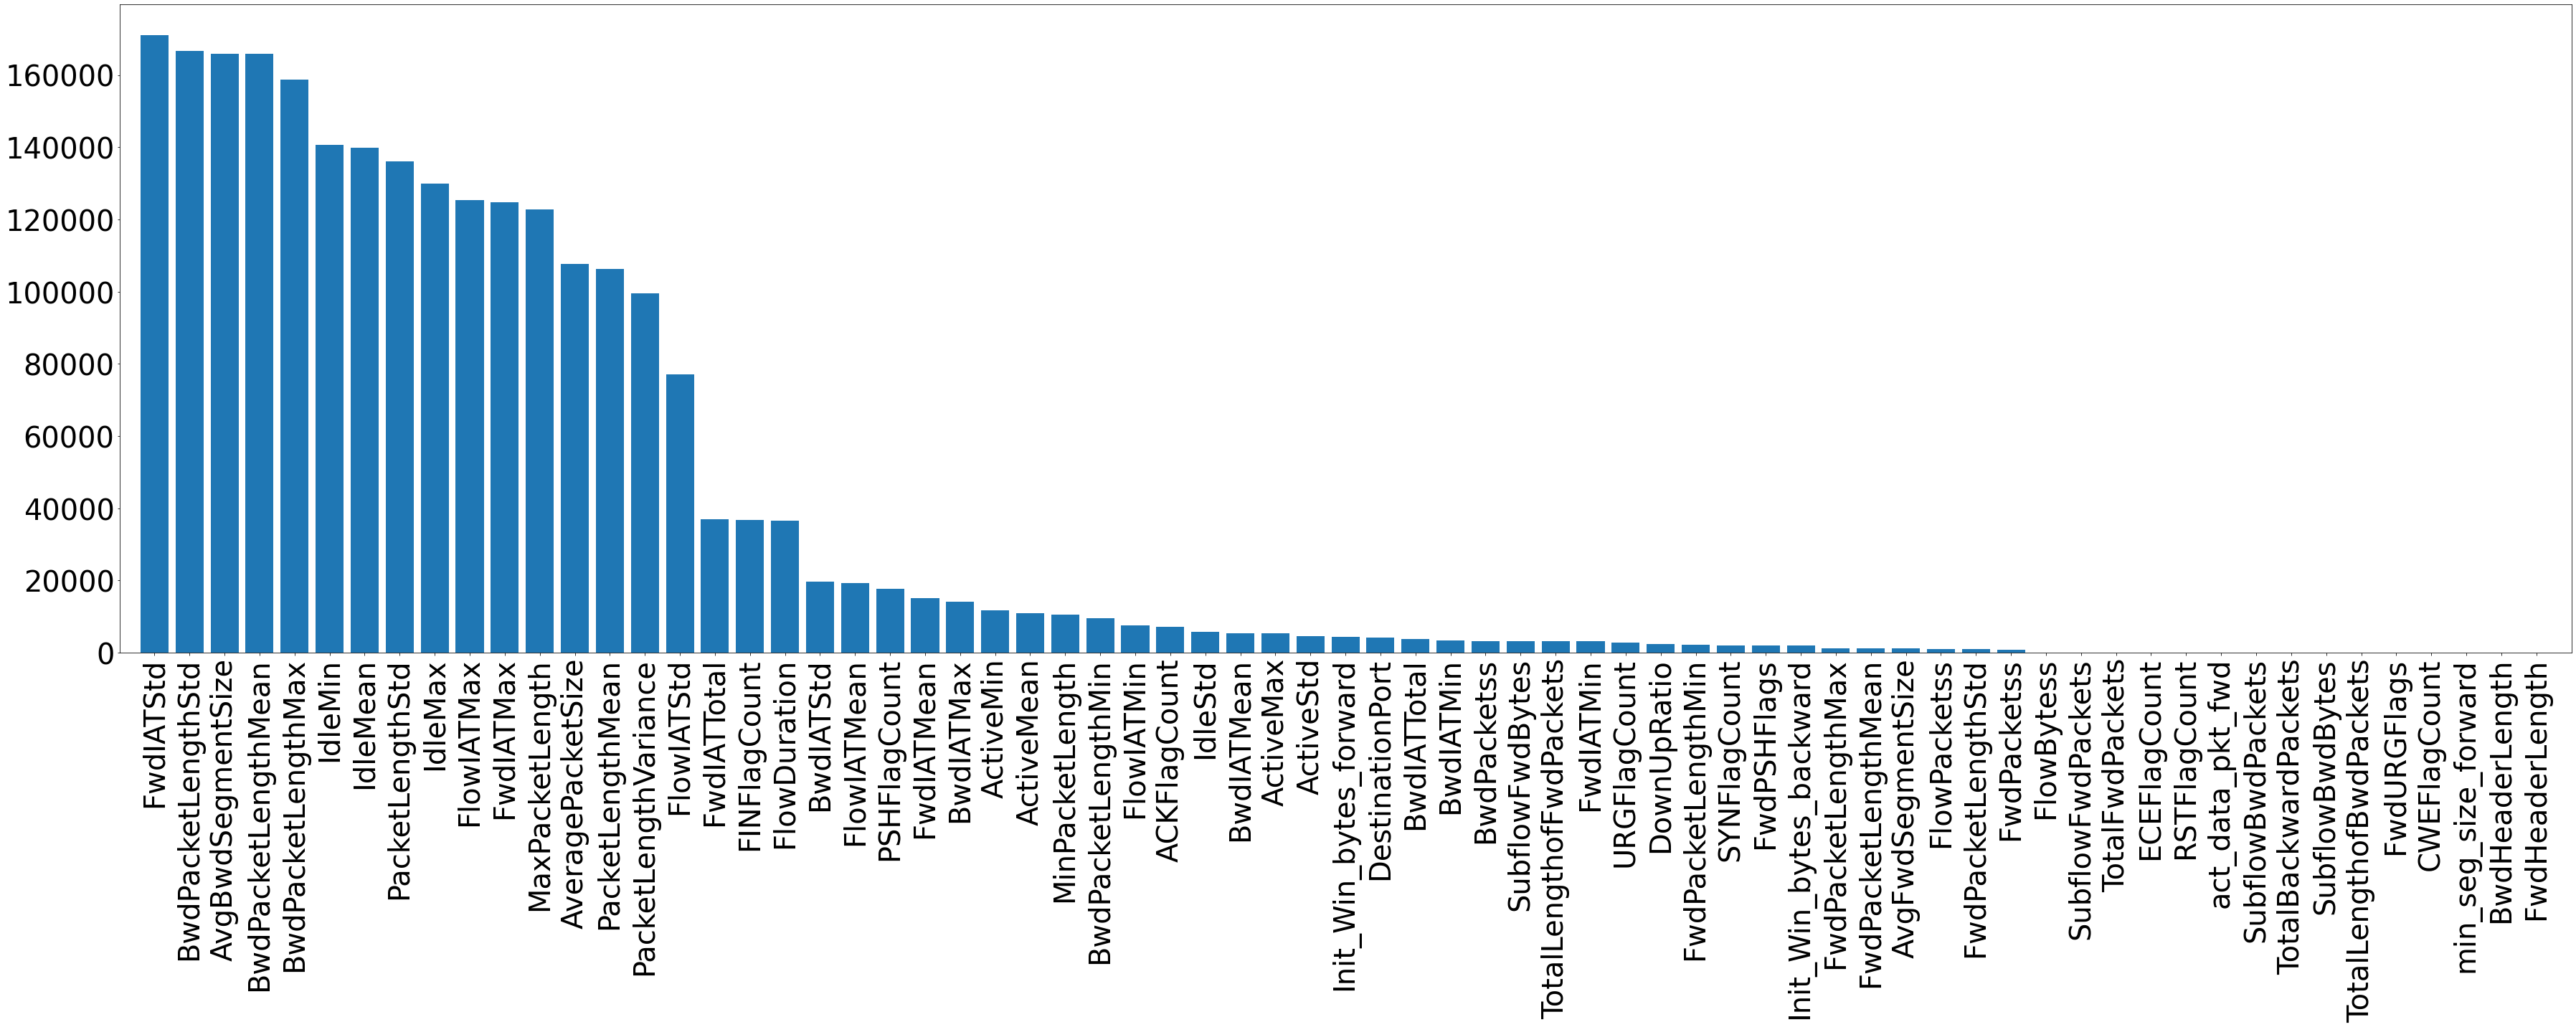

In [31]:
importances = fs.scores_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(50,20))
plt.bar(range(features_train.shape[1]), importances[indices], align='center')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

feat_labels = dataset.columns[:-1]
plt.xticks(range(features_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, features_train.shape[1]])

plt.tight_layout()
plt.show()

In [13]:
features_train.shape[1]

70

In [14]:
importances[indices]

array([1.70972353e+05, 1.66722199e+05, 1.65895223e+05, 1.65895223e+05,
       1.58836534e+05, 1.40686653e+05, 1.39809076e+05, 1.36097286e+05,
       1.29905604e+05, 1.25410175e+05, 1.24699657e+05, 1.22885951e+05,
       1.07619982e+05, 1.06241741e+05, 9.96083723e+04, 7.70275769e+04,
       3.70513204e+04, 3.67578626e+04, 3.65710417e+04, 1.97491489e+04,
       1.93714458e+04, 1.76974295e+04, 1.50533310e+04, 1.40658981e+04,
       1.17248077e+04, 1.08833725e+04, 1.06252399e+04, 9.61894975e+03,
       7.57731598e+03, 7.25304593e+03, 5.80772352e+03, 5.45533590e+03,
       5.43907339e+03, 4.68408074e+03, 4.46362469e+03, 4.11305146e+03,
       3.89429264e+03, 3.40535893e+03, 3.29115445e+03, 3.18935610e+03,
       3.17947512e+03, 3.14971839e+03, 2.89131563e+03, 2.34243365e+03,
       2.29221915e+03, 2.00872715e+03, 2.00872715e+03, 1.94316235e+03,
       1.20234039e+03, 1.16633872e+03, 1.16633872e+03, 1.04122358e+03,
       1.00692169e+03, 8.38052326e+02, 6.38695668e+01, 7.88846983e+00,
      

In [16]:
feat_labels

Index(['FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets',
       'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets',
       'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean',
       'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin',
       'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytess',
       'FlowPacketss', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin',
       'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin',
       'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin',
       'FwdPSHFlags', 'FwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength',
       'FwdPacketss', 'BwdPacketss', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       'DownUpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize',
    

In [20]:
dataset.columns

Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytess', 'FlowPacketss', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax',
       'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax',
       'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax',
       'BwdIATMin', 'FwdPSHFlags', 'FwdURGFlags', 'FwdHeaderLength',
       'BwdHeaderLength', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength',
       'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd',
       'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount',
       'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount',
       'ECEFlagCount', 'DownUpRatio', 'AveragePacketSize', 'AvgFw